In [0]:
# tulis NPM Anda di sini
NPM = '1706040031'

# Jika ada teman Anda yang juga merupakan peserta perkuliahan Pemelajaran Mesin membantu Anda
# mengerjakan tugas sini, tuliskan NPM teman Anda dalam bentuk array of string di sini
KOLABORATOR = ['', '']

# tulis referensi yang Anda gunakan untuk mengerjakan tugas ini
REFERENSI = [
    'https://stackoverflow.com/questions/23451244/how-to-zscore-normalize-pandas-column-with-nans',
    'https://stackoverflow.com/questions/24761998/pandas-compute-z-score-for-all-columns/41713622',
    'https://towardsdatascience.com/k-means-clustering-from-scratch-6a9d19cafc25',
]

PR ini terdiri dari 2 bagian:
1. Implementasi dan Analisis (skor = 50):
    * Soal 1 - Implementasi K-Means
    * Soal 2 - Implementasi K-Medoids
    * Soal 3 - Analisis
2. Demo program (skor = 50)

Berikut ketentuan pengerjaan PR 4:
* Anda diberikan berkas PR4\_UnsupervisedLearning.ipynb dan <i>dataset</i> Mall_Customers. <i>Dataset</i> tersebut mengandung atribut-atribut berikut:
  * CustomerID: ID pelanggan
  * Gender: Jenis kelamin pelanggan
  * Age: Umur pelanggan
  * Annual Income(k$): Pendapatan pelanggan per tahun
  * Spending Score: Skor yang diberikan ke pelanggan dari otoritas mal, berdasarkan uang yang dibelanjakan dan perilaku pelanggan    
* Tuliskan jawaban Anda di bagian <b># YOUR CODE HERE</b> pada berkas ini.
* Jangan mengubah <i>class</i> dan <i>method</i> yang sudah ada. Anda dipersilakan untuk menambahkan parameter, variabel, <i>method</i>, atau <i>class</i> baru jika diperlukan.
* <i>Library</i> yang boleh digunakan hanya yang disebutkan pada <i>cell</i> di bawah ini.
* Berikan penjelasan singkat mengenai <i>code</i> yang Anda tuliskan.
* Kumpulkan berkas ini melalui SCeLE dengan format penamaan PR4\_NPM\_KodeAsdos.ipynb sebelum tanggal 1 Juni 2020 pukul 23:55. Toleransi keterlambatan sampai jam 01:00 di hari selanjutnya (penalti 10% dari nilai total). Jika Anda telat sampai melewati jam 01:00, Anda diberikan kesempatan untuk mengumpulkan tugas ini melalui email asisten sesuai dengan kode asdos untuk demo paling lambat tanggal 2 Juni 2020 dengan nilai maksimum 50 poin. Kode Asdos dapat Anda temukan pada berkas Kode Asdos Machine Learning 2020 di <a href='https://scele.cs.ui.ac.id/course/view.php?id=836'>SCeLE</a>.
* <b>Jangan menunda-nunda pekerjaan ini karena konten tugas cukup banyak</b>. Hubungi Hadi di telegram (@putrahadisyah) atau bertanya melalui grup <a href='https://t.me/joinchat/BeCN9BuP_Z3ZA3nalUuxBg'>Mahasiswa ML 2019/2020</a> di telegram jika ada pertanyaan.

Berikut pembagian asisten dosen untuk PR 4:

| Kode Asdos | Nama Asdos | Email |
| --- | --- | --- |
| A | Raditya Nurfadillah | raditya.nurfadillah91@ui.ac.id |
| B | Syifa Nurhayati | syifa.nurhayati@ui.ac.id |
| C | Gries Yulianti | gries.yulianti@ui.ac.id |
| D | Hadi Syah Putra | hadi.syah@ui.ac.id |

Untuk demo, Anda dapat memilih untuk melakukan demo <i>offline</i> atau demo <i>online</i>.
* Demo <i>offline</i>: Anda dapat membuat video yang menjelaskan kode program dan mengisi <i>form</i> <a href='https://forms.gle/mSmgaUNghxrW54LXA'>ini</a> dengan tautan unggahan video tersebut paling lambat tanggal 10 Juni 2020 pukul 23:55. Video berdurasi maksimal 15 menit. Kriteria isi video meliputi penjelasan kode yang Anda kerjakan pada bagian <b># YOUR CODE HERE</b>.
* Demo <i>online</i>: Anda dapat mengisi jadwal demo melalui tautan Booking Slot Demo PR 4 di <a href='https://scele.cs.ui.ac.id/course/view.php?id=836'>SCeLE</a>. 

In [0]:
from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal
from scipy.stats import zscore
import math
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import seaborn as sns
import timeit
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
def is_similar(X, Y):
    if isinstance(X, list) and isinstance(Y, list):
        if len(X) == len(Y):
            return all([is_similar(x, Y[i]) for i, x in enumerate(X)])
        else:
            return False
    return abs(X-Y) <= 1e-7

<b>Daftar Isi</b>

* [K-Means](#K-Means)
    * [Inisialisasi (K-Means)](#Inisialisasi-(K-Means))
    * [1 Iterasi K-Means](#1-Iterasi-K-Means)
    * [Implementasi (K-Means)](#Implementasi-(K-Means))
* [K-Medoids](#K-Medoids)
    * [Inisialisasi (K-Medoids)](#Inisialisasi-(K-Medoids))
    * [1 Iterasi K-Medoids](#1-Iterasi-K-Medoids)
    * [Implementasi (K-Medoids)](#Implementasi-(K-Medoids))

# K-Means
K-Means adalah algoritma <i>clustering</i> yang mengelompokkan data menjadi $k$ klaster. Pada setiap klaster terdapat titik pusat (<i>centroid</i>) yang merepresentasikan klaster tersebut.

In [0]:
df_input = pd.read_csv('Mall_Customers.csv')
df = df_input.copy()
print(df.shape[0])
df.head()

200


CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [0]:
# encode atribut kategorikal (Gender): 'M'->'1' dan 'F'->'0'
df.replace({'Gender' : {'Female': 0, 'Male': 1}}, inplace=True)

# YOUR CODE HERE
# Lulus
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       1   19                  15                      39
1           2       1   21                  15                      81
2           3       0   20                  16                       6
3           4       0   23                  16                      77
4           5       0   31                  17                      40

In [0]:
# normalisasi data di setiap kolom, kecuali CustomerID. Hint: gunakan fungsi zscore

columns = list(df.columns)
columns.remove('CustomerID')
# YOUR CODE HERE
# Lulus
for col in columns:
    df[col] = (df[col] - df[col].mean()) / df[col].std(ddof=0)
    
df.head()

CustomerID    Gender       Age  Annual Income (k$)  Spending Score (1-100)
0           1  1.128152 -1.424569           -1.738999               -0.434801
1           2  1.128152 -1.281035           -1.738999                1.195704
2           3 -0.886405 -1.352802           -1.700830               -1.715913
3           4 -0.886405 -1.137502           -1.700830                1.040418
4           5 -0.886405 -0.563369           -1.662660               -0.395980

Dari data yang mengandung informasi pelanggan (<i>customer</i>), kita akan mengelompokkan pelanggan-pelanggan tersebut ke dalam 3 klaster.

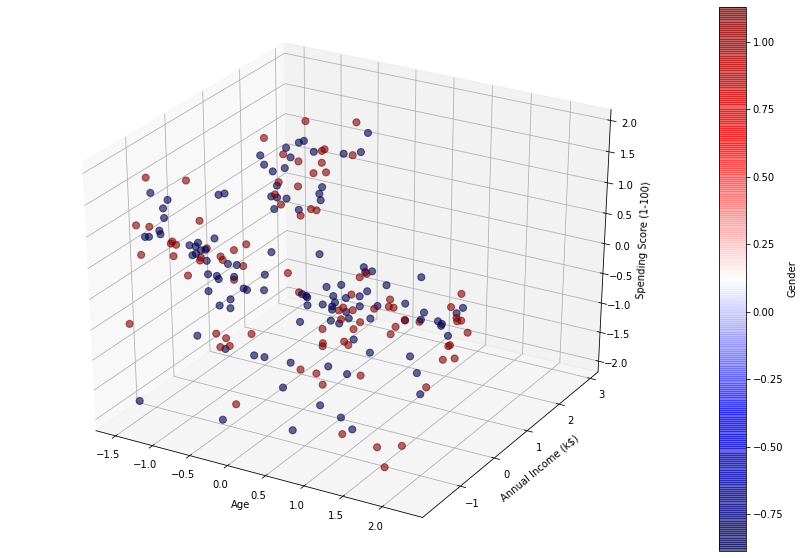

In [0]:
# visualisasi data
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

xs = df['Age']
ys = df['Annual Income (k$)']
zs = df['Spending Score (1-100)']
c = df['Gender']

img = ax.scatter(xs, ys, zs, c=c, s=50, alpha=0.6, cmap='seismic')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
fig.colorbar(img, label='Gender')
plt.show()

In [0]:
points = df[list(set(df.columns)-set(['CustomerID']))].values

points

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

## Inisialisasi (K-Means)

Pertama, kita memilih 3 <i>centroid</i> awal secara random yang mewakili titik tengah dari masing-masing klaster.

In [0]:
def initialize_rep(X, k, seed=None):
    if seed:
        np.random.seed(seed)

    random_idx = np.random.choice(X.shape[0], size=k, replace=False)
    rep = X[random_idx, :]
    return rep


ic = initialize_rep(points, 3, 200)
ic # Cluster?

array([[-0.88640526, -0.06100169,  0.24581112, -0.39597992],
       [ 1.12815215, -0.49160182,  1.00919971,  0.49691598],
       [-0.88640526,  0.58489852,  2.26879087, -1.32769738]])

## 1 Iterasi K-Means
Di dalam satu iterasi K-Means, ada beberapa langkah sebagai berikut:
1. Menghitung jarak setiap titik ke <i>centroid</i> saat ini.
2. Tentukan klaster setiap titik berdasarkan perhitungan jarak pada langkah (1)
3. Optimisasi <i>centroid</i> saat ini dengan menghitung rata-rata dari sekumpulan titik pada masing-masing klaster.

Secara berulang, kita menghitung jarak masing-masing titik ke <i>centroid</i> saat ini untuk mengoptimisasi posisi <i>centroid</i>. Pada kasus ini, kita akan menggunakan <i>Euclidean distance</i> sebagai jarak antar titik. 

<b>Permasalahan</b>: Lengkapi fungsi $euclidean\_distance$ dan $compute\_distance\_matrix$ di bawah ini hanya dengan menggunakan <i>library</i> yang sudah kita impor sebelumnya.  

<i>Hint</i>:<br>
$x_1$ dan $x_2$ adalah sebuah <i>array</i> berukuran sama dan keduanya merepresentasikan sebuah titik dalam koordinat Cartesian.<br>
$rep$ adalah representasi dari sebuah klaster (<i>centroid</i> / <i>medoid</i>)<br>
$S$ adalah <i>distance matrix</i>

In [0]:
# https://towardsdatascience.com/k-means-clustering-from-scratch-6a9d19cafc25
def euclidean_distance(x1, x2):
    distance = (sum((x1 - x2)**2))**0.5
    # YOUR CODE HERE
    # Lulus
    return distance

def compute_distance_matrix(X, rep):
    # Contoh param: X=np.array([x1, x2]), rep=[[1,1]]
    number_of_points = len(X)
    number_of_clusters = len(rep)
    distance_matrix = []
    
    for i in range(number_of_points):
        distances = []
        for j in range(number_of_clusters):
            distance_point_to_cluster = euclidean_distance(X[i], rep[j])
            distances.append(distance_point_to_cluster)
        distance_matrix.append(distances)

    return np.array(distance_matrix)

In [0]:
# untuk memeriksa apakah fungsi euclidean_distance Anda telah diimplementasikan dengan benar
x1 = np.array([1, 0])
x2 = np.array([1, 2])
distance = euclidean_distance(x1, x2)
assert is_similar(distance, 2.0)

# untuk memeriksa apakah fungsi compute_distance_matrix Anda telah diimplementasikan dengan benar
assert is_similar(
    list(compute_distance_matrix(
        np.array([x1, x2]), 
        [[1,1]]
        )
    ), 
    list([1,1])
)

print(list(compute_distance_matrix(np.array([x1, x2]), [[1,1]])))

[array([1.]), array([1.])]


In [0]:
# gatau, masih bingung
S = compute_distance_matrix(points, ic)
#S.shape
#for distance in S:
#    print(distance)
S

array([[3.1398624 , 3.04813418, 4.99560254],
       [3.46696607, 2.94348558, 5.47449423],
       [2.68335282, 4.12807209, 4.43433005],
       [2.64792413, 3.48070146, 4.93280055],
       [1.97348315, 3.46405704, 4.20034798],
       [2.62944855, 3.4593389 , 4.9092722 ],
       [2.29926229, 3.99220915, 4.00624765],
       [3.00859201, 3.58612479, 5.22432633],
       [3.6000138 , 4.1756925 , 4.54571416],
       [2.286837  , 3.30724202, 4.59093473],
       [3.57288331, 4.08223231, 4.58110732],
       [2.94097371, 3.57697429, 5.09765265],
       [2.49407958, 4.18958097, 3.89791813],
       [2.50819299, 3.35015121, 4.78556319],
       [2.89492343, 3.23057168, 4.37676874],
       [3.29963367, 2.72780403, 5.2752502 ],
       [1.77956276, 3.41066743, 3.94523294],
       [3.13509335, 2.66486576, 5.08527662],
       [2.84092603, 3.12568242, 4.26027316],
       [2.81724207, 3.45231719, 4.95817706],
       [2.61463027, 2.6477138 , 4.33255293],
       [3.04367106, 2.48707479, 4.98745572],
       [2.

Setelah itu, kita perlu menentukan klaster dari masing-masing titik berdasarkan perhitungan jarak yang telah kita lakukan sebelumnya.

<b>Permasalahan</b>: Lengkapi fungsi $assign\_label$ di bawah ini hanya dengan menggunakan <i>library</i> yang sudah kita impor sebelumnya.

<i>Hint</i>: <br>
$S$ adalah <i>distance matrix</i>

In [0]:
# https://thispointer.com/numpy-amin-find-minimum-value-in-numpy-array-and-its-index/

# udah sama kek kak hadi
def assign_label(S):
    result = np.argmin(S, axis=1)
    #print("result:", result)
    return result
    #return np.argmin(S, axis=1)

In [0]:
# untuk memeriksa apakah fungsi assign_label Anda telah diimplementasikan dengan benar
#idx = assign_label([[3, 1, 3], [2, 10, 20]])
# LULUS
idx = assign_label([[1, 2, 3]])
print("idx: ", idx)
print("type idx:", type(idx))
assert is_similar(idx, 0)
#assert is_similar(idx, [1,0])

idx:  [0]
type idx: <class 'numpy.ndarray'>


In [0]:
labels = assign_label(S)
labels
#print(labels)


array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 2, 0,
       2, 1, 2, 1, 0, 0, 1, 1, 0, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1])

Selanjutnya, kita menghitung nilai rata-rata sekumpulan titik pada masing-masing klaster. Nilai rata-rata tersebut akan digunakan sebagai titik tengah (<i>centroid</i>) yang baru di masing-masing klaster.

<b>Permasalahan</b>: Lengkapi fungsi $update\_centroids$ di bawah ini hanya dengan menggunakan <i>library</i> yang sudah kita impor sebelumnya.

<i>Hint</i>: <br>
$X$ = <i>datapoints</i> <br>
$labels$ = <i>array</i> yang berisikan indeks <i>centroid</i> yang telah ditentukan setelah pemanggilan fungsi $assigned\_label$<br>
$old\_centroids$ = <i>centroid</i> yang ingin kita optimisasi

In [0]:
# https://www.geeksforgeeks.org/numpy-mean-in-python/
# Lulus harusnya
def update_centroids(X, labels, old_centroids):
    new_centroid = np.zeros(old_centroids.shape)
    
    clusters = list(set(list(labels)))

    separated = []
    #print("[update_centroids] \nclusters: {}".format(clusters))
    for i in range(len(clusters)):
        separated.append([])
        
    #for i in range(len(X)):
    for i in range(len(labels)):
        separated[labels[i]].append(X[i])
        
    #print("[update_centroids] \nseparated: {}".format(separated))
    
    for i in range(len(separated)):
        new_centroid[i] = np.mean(separated[i], axis = 0)

    # print("[update_centroids] new_centroid:", new_centroid)
    return np.round(new_centroid, 3)

In [0]:
# untuk memeriksa apakah fungsi update_centroids Anda telah diimplementasikan dengan benar
# LULUS

# labels: 1d flat
lbl = [0, 0, 0, 1, 1, 1]

# points: 2D
X = np.array([[1, 0], [5, 2], [1, -1], [1, 1], [2, 2], [5, -2]])

# ic: 2D
c = np.array([[2, 2], [3, 2]])

c = update_centroids(X, lbl, c)

# 2D
goals = np.array([[2.333, 0.333],
                  [2.667, 0.333]])
np.testing.assert_allclose(c, goals, rtol=1e-5, atol=0)

In [0]:
new_centroid = update_centroids(points, labels, ic)
new_centroid

array([[-0.707,  0.018, -0.297, -0.014],
       [ 1.05 , -0.105,  0.194,  0.208],
       [-0.154,  0.552,  1.668, -1.31 ]])

1 iterasi algoritma K-means telah kita lakukan. Iterasi ini akan berhenti ketika <i>centroid</i> berhenti bergerak atau dengan kata lain $new\_centroids == old\_centroids$.

## Implementasi (K-Means)
Untuk menyempurnakan algoritma K-means yang telah kita jalankan untuk 1 iterasi, berikut merupakan implementasi dari kelas K-means kita:

<b>Permasalahan</b>: Lengkapi kelas $Kmeans$ di bawah ini hanya dengan menggunakan <i>library</i> yang sudah kita impor sebelumnya.

In [0]:
class Kmeans:
    def __init__(self, n_clusters, seed=None):
        self.centroids = None
        self.n_clusters = n_clusters
        self.seed = seed
        self.labels = None
        self.points = df[list(set(df.columns)-set(['CustomerID']))].values

    def initialize_centroids(self, X):
        if self.seed:
            np.random.seed(self.seed)

        random_idx = np.random.choice(X.shape[0], size=self.n_clusters, replace=False)
        centroids = X[random_idx, :]
        self.initial_centroids = centroids 
        return centroids

    # https://towardsdatascience.com/k-means-clustering-from-scratch-6a9d19cafc25
    def euclidean_distance(self, x1, x2):
        distance = (sum((x1 - x2)**2))**0.5
        return distance

    def compute_distance_matrix(self, X, rep):
        number_of_points = len(X)
        print("number of points:", number_of_points)
        
        number_of_clusters = len(rep)
        print("number of clusters:", number_of_clusters)
        distance_matrix = []
        
        for i in range(number_of_points):
            distances = []
            for j in range(number_of_clusters):
                distance_point_to_cluster = euclidean_distance(X[i], rep[j])
                distances.append(distance_point_to_cluster)
            distance_matrix.append(distances)
       
        distance_matrix = np.array(distance_matrix)
        print("[compute distance matrix] distance_matrix:\n", distance_matrix)
        return distance_matrix

    def assign_label(self, S):
        #print("S:\n", S)
        result = np.argmin(S, axis=1)
        #print("[assign label] result:\n", result)
        return result

    def update_centroids(self, X, labels, old_centroids):
        new_centroid = np.zeros(old_centroids.shape)
    
        clusters = list(set(list(labels)))
        separated = []

        for i in range(len(clusters)):
            separated.append([])
            
        for i in range(len(labels)):
            separated[labels[i]].append(X[i])
            
        #for i in range(len(old_centroids)):
        for i in range(len(separated)):
            new_centroid[i] = np.mean(separated[i], axis = 0)
    
        new_centroid = np.round(new_centroid, 3)
        print("[update_centroids] new_centroid:\n", new_centroid)
        return new_centroid
    
    def fit(self, X):
        self.centroids = self.initialize_centroids(X)
        old_centroids = None
        
        iterations = 0
        # algoritma berhenti ketika centroid klaster sekarang sama dengan
        # centroid klaster di iterasi sebelumnya
        while not np.array_equal(old_centroids, self.centroids):
            distance_matrix = compute_distance_matrix(self.points, self.centroids)
            print("[while] distance matrix:\n", distance_matrix)
            # self.labels = self.assign_label(self.points)
            # YOUR CODE HERE
            print("[while] centroid sblm diupdate:\n", self.centroids)
            self.labels = self.assign_label(distance_matrix)
            print("[while] self.labels=\n", self.labels)
            old_centroids = self.centroids
            print("[while] old_centroids=\n", old_centroids)
            self.centroids = self.update_centroids(X, self.labels, old_centroids)
            print("[while] centroid stlh diupdate=\n", self.centroids)
            iterations += 1
          
        print("num of iterations: ", iterations)
            
    def predict(self, X):
        labels = self.assign_label(X)
        
        return labels

In [51]:
kmeans = Kmeans(3, 200)
kmeans.fit(points)

# untuk memeriksa apakah kelas Kmeans Anda telah diimplementasikan dengan benar
X_test = np.array([[-1.4, -1.7, -0.4, 1.1]])
y_pred = kmeans.predict(X_test)
y_pred
#assert is_similar(y_pred, [0]) # abaikan

[while] distance matrix:
 [[3.1398624  3.04813418 4.99560254]
 [3.46696607 2.94348558 5.47449423]
 [2.68335282 4.12807209 4.43433005]
 [2.64792413 3.48070146 4.93280055]
 [1.97348315 3.46405704 4.20034798]
 [2.62944855 3.4593389  4.9092722 ]
 [2.29926229 3.99220915 4.00624765]
 [3.00859201 3.58612479 5.22432633]
 [3.6000138  4.1756925  4.54571416]
 [2.286837   3.30724202 4.59093473]
 [3.57288331 4.08223231 4.58110732]
 [2.94097371 3.57697429 5.09765265]
 [2.49407958 4.18958097 3.89791813]
 [2.50819299 3.35015121 4.78556319]
 [2.89492343 3.23057168 4.37676874]
 [3.29963367 2.72780403 5.2752502 ]
 [1.77956276 3.41066743 3.94523294]
 [3.13509335 2.66486576 5.08527662]
 [2.84092603 3.12568242 4.26027316]
 [2.81724207 3.45231719 4.95817706]
 [2.61463027 2.6477138  4.33255293]
 [3.04367106 2.48707479 4.98745572]
 [2.17849132 3.96714071 3.65186004]
 [2.91925361 2.39920943 4.83964268]
 [2.13384136 3.90401463 3.54818933]
 [3.05779822 2.37947674 4.96219944]
 [1.60149327 3.38359166 3.56898719]
 [

array([1])

<br>
<font size=6><b>Playground</b></font>

<b>P1</b>: membandingkan kelas Kmeans dengan KMeans sklearn

In [0]:
from sklearn.cluster import KMeans

def plot_2d(X, title, labels):
    plt.style.use('dark_background')
    pca_2d = PCA(n_components=2).fit(X).transform(X)
    plt.figure(figsize=(15, 10))
    plt.title(title)
    img = plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=labels, cmap='plasma')
    plt.colorbar(img)
    plt.show()

In [53]:
print(kmeans.labels)

[1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0
 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 2 1 2 1 0 0 2 0 2 1 2 0 2 1 0 0 2 1 1 0
 2 1 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 1 2 1 2 1 2 0 2 1 2 1 2 0 2 0 2
 1 2 1 2 0 2 0 2 0 2 0 2 1 2 1]


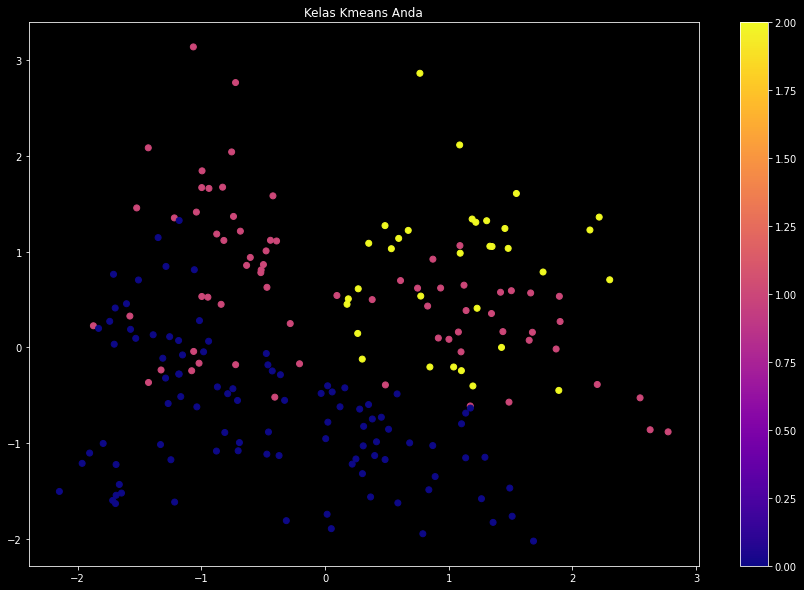

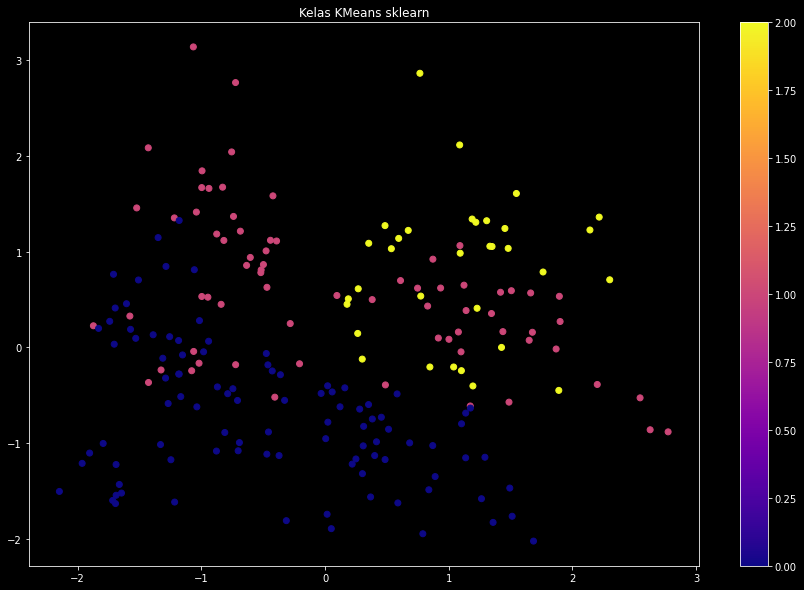

In [54]:
# kelas Kmeans
# kmeans.labels: simpan label data setelah menjalankan algo Kmeans Anda
plot_2d(points, 'Kelas Kmeans Anda', kmeans.labels)

# KMeans sklearn
kmeans_comparison = KMeans(n_clusters=3,
                           init=kmeans.initial_centroids,  # simpan initial centroid algo Kmeans Anda
                           n_init=1,
                           max_iter=1000000000)
kmeans_comparison.fit(points)
plot_2d(points, 'Kelas KMeans sklearn', kmeans_comparison.labels_)

<b>P2</b>: Mengintepretasikan hasil <i>clustering</i> algoritma K-Means

Jumlah pelanggan di setiap klaster:
Cluster
0    97
1    70
2    33
Name: CustomerID, dtype: int64

Distribusi gender di setiap klaster:



Distribusi Age di setiap klaster:



Distribusi Annual Income (k$) di setiap klaster:



Distribusi Spending Score (1-100) di setiap klaster:


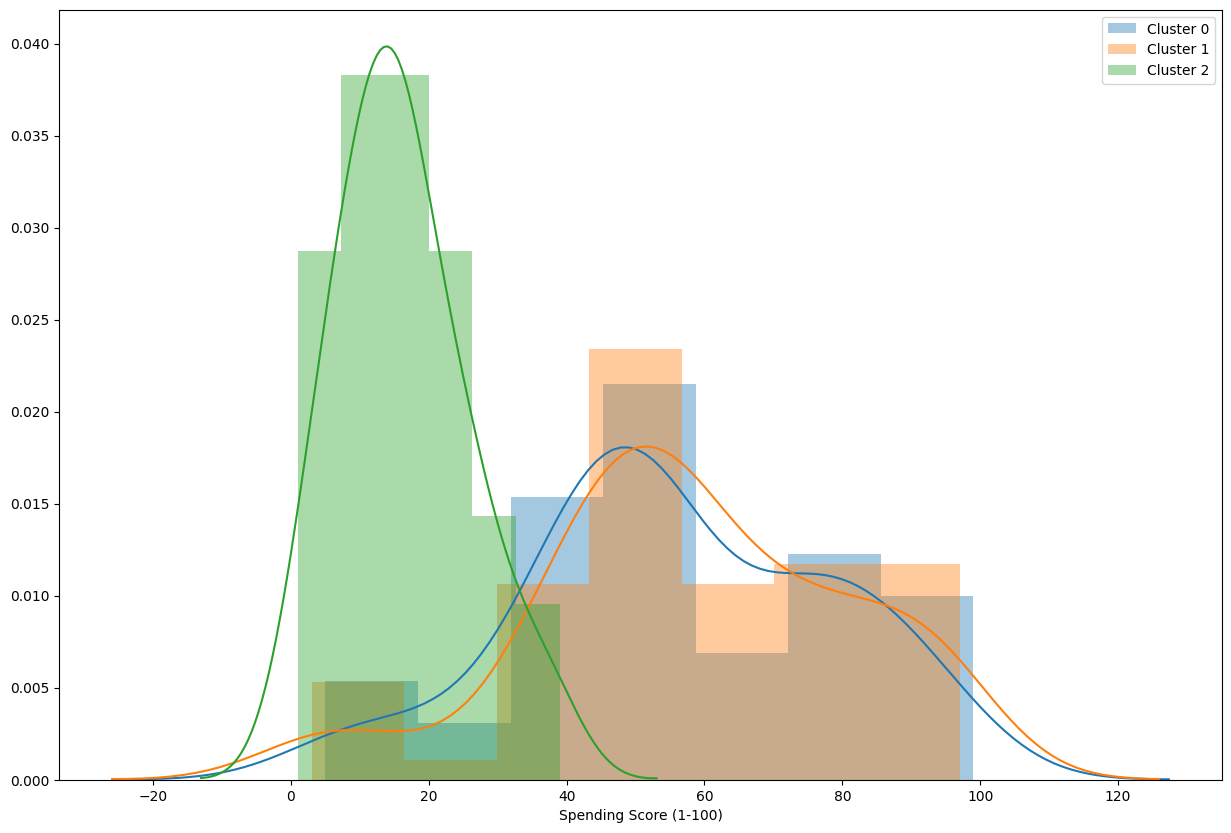

In [56]:
df_copy_kmeans = df_input.copy()
df_copy_kmeans['Cluster'] = kmeans.labels


def visualize_cat(data, column_name):
    plt.style.use('default')
    fig, axes = plt.subplots(figsize=(15, 5), nrows=1, ncols=3)
    for c in set(kmeans.labels):
        df_cluster = data[data['Cluster'] == c]
        count = df_cluster[column_name].value_counts(normalize=True)
        axes[c].bar(count.index, count.values)
        axes[c].text(0.5, -0.2, 'Cluster ' + str((c)),
                     horizontalalignment='center', transform=axes[c].transAxes)
    plt.show()


def visualize_num(data, column_name):
    plt.style.use('default')
    # histogram
    plt.figure(figsize=(15, 10))
    for c in set(kmeans.labels):
        df_cluster = data[data['Cluster'] == c]
        sns.distplot(df_cluster[column_name],
                     norm_hist=True, label='Cluster ' + str(c))
        plt.legend()
    plt.show()

    # boxplot
    plt.figure(figsize=(15, 10))
    sns.boxplot(x='Cluster', y=column_name, data=data)
    plt.show()


# exploratory data analysis
print('Jumlah pelanggan di setiap klaster:')
print(df_copy_kmeans.groupby('Cluster')['CustomerID'].nunique())
print('='*90 + '\n')

print('Distribusi gender di setiap klaster:')
visualize_cat(df_copy_kmeans, 'Gender')
print('='*90 + '\n')

for c in set(df_copy_kmeans.columns) - set(['CustomerID', 'Gender', 'Cluster']):
    print('Distribusi {} di setiap klaster:'.format(c))
    visualize_num(df_copy_kmeans, c)
    print('='*90 + '\n')

<b>P3</b>: Evaluasi hasil <i>clustering</i> algoritma K-Means

<i>Clustering</i> dapat dievaluasi dengen menghitung skor silhouette, yaitu skor antara -1 (<i>bad clustering</i>) dan 1 (<i>good clustering</i>) yang menunjukkan apakah suatu klaster memiliki kohesi dan separasi yang bagus. 

Untuk menghitung skor silhouette, ikuti langkah-langkah berikut:
1. Untuk tiap titik data, hitung rata-rata jarak ke semua titik data di klaster yang sama (tidak termasuk titik yg sedang dihitung skor silhouette-nya). Misal, hasil perhitungan tersebut kita sebut $a$.
2. Untuk tiap titik data dan klaster yang tidak mengandung titik tersebut, hitung rata-rata jarak ke semua titik data yang berada di klaster lain. Dari perhitungan untuk masing-masing klaster lain, ambil rata-rata jarak terpendek. Hasil perhitungan ini kita sebut $b$.
3. Untuk setiap titik data, hitung skor silhouette: $s = (b-a)/max(a,b)$

<b>Permasalahan</b>: Lengkapi fungsi $silhouette\_score$ di bawah ini hanya dengan menggunakan <i>library</i> yang sudah kita impor sebelumnya.

<i>Hint</i>:<br>
Untuk titik data $i \in C_i$ (titik data $i$ pada klaster $C$)
* $a(i)=\frac{1}{(|C_i|-1)}\Sigma_{j \in C_i,i \neq j} d(i,j)$
* $b(i)=\min_{k \neq i}\frac{1}{(|C_k|)}\Sigma_{j \in C_k} d(i,j)$
* $s(i)=\frac{b(i)-a(i)}{max\{a(i),b(i)\}}$

In [0]:
# mengembalikan datapoints dengan label l
# hint: gunakan fungsi ini untuk menemukan titik-titik data yang satu klaster
# atau beda dengan klaster dengan suatu titik data
def get_points(X, labels, l):
    indices = [i for i, x in enumerate(labels) if x == l]
    points = []
    for i in indices:
        points.append(X[i])
    return points


def silhouette_score(X, labels):
    s_arr = []
    for i in range(len(X)):
        a = None
        b = float('inf')

        # YOUR CODE HERE
        raise NotImplementedError()

        # menghitung skor silhouette
        s = (b - a) / max(a, b)
        s_arr.append(s)

    print('Skor silhouette: ', np.mean(s_arr))
    return np.mean(s_arr)

In [0]:
# untuk memeriksa apakah fungsi silhouette_score
from sklearn.metrics import silhouette_score as ss
assert is_similar(ss(points, kmeans.labels),
                  silhouette_score(points, kmeans.labels))

# K-Medoids
K-Medoids adalah algoritma <i>clustering</i> yang agak sedikit berbeda dengan K-Means. Perbedaannya, yaitu:

Pada K-Means, <i>centroid</i> yang merupakan bentuk representasi dari suatu klaster, bisa jadi tidak berasal dari titik data. Sedangkan, K-Medoids memilih medoid (objek yang merepresentasikan suatu klaster) yang berasal dari titik-titik data.

Dalam uji coba menggunakan algoritma ini, kita menggunakan data yang telah kita gunakan sebelumnya pada algoritma K-Means. Data tersebut juga dikelompokkan menjadi 3 klaster.

## Inisialisasi (K-Medoids)
Sama halnya dengan K-Means, K-Medoids mengharuskan kita untuk memilih 3 <i>medoid</i> awal secara random yang mewakili tiap klaster.

In [0]:
im = initialize_rep(points, 3, 200)
im

## 1 Iterasi K-Medoids
K Medoids memiliki beberapa varian algoritma. Pada implementasi kali ini, kita akan menggunakan algo Partitioning Around Medoids (PAM). Dalam satu iterasi untuk mendapatkan <i>medoid</i> terbaik (<i>medoid</i> dengan <i>cost</i> terkecil) pada algo tersebut, ada beberapa langkah sebagai berikut:
1. Menghitung jarak setiap titik ke <i>medoid</i> saat ini (sama dengan K-Means).
2. Tentukan klaster setiap titik berdasarkan perhitungan jarak pada langkah (1) (sama dengan K-Means) dan hitung <i>cost</i> berdasarkan konfigurasi klaster. <i>Cost</i> merupakan hasil penjumlahan jarak terpendek dari setiap titik ke <i>medoid</i> saat ini.
3. Ambil titik data yang bukan <i>medoid</i> untuk dijadikan kandidat baru <i>medoid</i>. Untuk masing-masing <i>medoid</i>, <i>swap</i> <i>medoid</i> dengan kandidat tersebut. Jika <i>cost</i> dengan konfigurasi <i>medoid</i> hasil <i>swap</i> lebih kecil, <i>update medoid</i>.

Secara berulang, kita ulangi langkah 1-3 untuk mendapatkan konfigurasi <i>medoid</i> dengan <i>cost</i> terkecil. Gunakan referensi <a href='https://sci-hub.tw/https://link.springer.com/chapter/10.1007/11424857_20'>ini</a> untuk memahami bagaimana algoritma PAM diimplementasikan. 

In [0]:
# langkah 1 
S = compute_distance_matrix(points, im)
S

In [0]:
# langkah 2
labels = assign_label(S)
labels

<b>Permasalahan</b>: Lengkapi fungsi $calculate\_cost$ di bawah ini hanya dengan menggunakan <i>library</i> yang sudah kita impor sebelumnya. Ingat! <i>Cost</i> merupakan hasil penjumlahan jarak terpendek dari setiap titik ke <i>medoid</i> saat ini (<i>sum of square</i>).

<i>Hint</i>:<br>
S adalah <i>distance matrix</i>

In [0]:
def calculate_cost(S):
    # YOUR CODE HERE
    
    raise NotImplementedError()

In [0]:
# untuk memeriksa apakah fungsi calculate_cost Anda telah diimplementasikan dengan benar
x1 = np.array([1, 0])
x2 = np.array([1, 2])

s = compute_distance_matrix(np.array([x1, x2]), [[1,1]])
assert is_similar(calculate_cost(s), 2)

In [0]:
cost = calculate_cost(S)
cost

<b>Permasalahan</b>: Lengkapi fungsi $update\_medoids$ di bawah ini hanya dengan menggunakan <i>library</i> yang sudah kita impor sebelumnya.  

<i>Hint</i>:<br>
$X$ = <i>datapoints</i> <br>
$labels$ = <i>array</i> yang berisikan indeks <i>medoid</i> yang telah ditentukan setelah pemanggilan fungsi $assigned\_label$<br>
$medoids$ = <i>medoid</i> yang ingin kita optimisasi<br>
$cost$ = <i>cost</i> dari $medoids$

Gunakan referensi <a href='https://sci-hub.tw/https://link.springer.com/chapter/10.1007/11424857_20'>ini</a> bagian 2.1 untuk membantu Anda.

In [0]:
def update_medoids(X, medoids, cost):
    while True:
        best_medoids = medoids
        lowest_cost = cost

        # iterasi sampai mendapatkan medoid dengan cost terendah
        # YOUR CODE HERE
        raise NotImplementedError()

        if lowest_cost < cost:
            cost = lowest_cost
            medoids = best_medoids
        else:
            break

    print('Best medoids: ', best_medoids)
    print('Lowest cost: ', lowest_cost)

    return best_medoids, lowest_cost

In [0]:
best_medoids, lowest_cost = update_medoids(points, im, cost)
# untuk memeriksa apakah fungsi update_medoids Anda telah diimplementasikan dengan benar
assert is_similar(lowest_cost, 292.8331062151385)

## Implementasi (K-Medoids)
Untuk menyempurnakan algoritma K-Medoids yang telah kita jalankan sampai mendapatkan <i>medoid</i> terbaik, berikut merupakan implementasi dari kelas KMedoids kita:

<b>Permasalahan</b>: Lengkapi kelas $KMedoids$ di bawah ini hanya dengan menggunakan <i>library</i> yang sudah kita impor sebelumnya.

In [0]:
class Kmedoids:
    def __init__(self, n_clusters, seed=None):
        self.n_clusters = n_clusters
        self.seed = seed

    def initialize_medoids(self, X):
        if(self.seed):
            np.random.seed(self.seed)

        random_idx = np.random.choice(
            X.shape[0], size=self.n_clusters, replace=False)
        medoids = X[random_idx, :]
        return medoids

    def euclidean_distance(self, x1, x2):
        distance = 0

        # YOUR CODE HERE
        raise NotImplementedError()

        return distance

    def compute_distance_matrix(self, X, rep):
        r = len(X)
        c = len(rep)
        S = np.empty((r, c))
        
        # YOUR CODE HERE
        raise NotImplementedError()

    def assign_label(self, S):
        # YOUR CODE HERE
        raise NotImplementedError()

    def calculate_cost(self, S):
        # YOUR CODE HERE
        raise NotImplementedError()

    def update_medoids(self, X, cost):
        best_medoids = self.initial_medoids
        lowest_cost = cost
        while True:
            # iterasi sampai mendapatkan medoid dengan cost terendah
            # YOUR CODE HERE
            raise NotImplementedError()
            
            if lowest_cost < cost:
                cost = lowest_cost
                medoids = best_medoids
            else:
                break

        print('Best medoids: ', best_medoids)
        print('Lowest cost: ', lowest_cost)

        return best_medoids, lowest_cost

    def fit(self, X):
        self.initial_medoids = self.initialize_medoids(X)
        
        # YOUR CODE HERE
        raise NotImplementedError()
        
        self.labels = assign_label(self.compute_distance_matrix(X, self.best_medoids))

    def predict(self, X):
        labels = []
        
        # YOUR CODE HERE
        raise NotImplementedError()

        return labels

In [0]:
kmedoids = Kmedoids(3, 200)
kmedoids.fit(points)

# untuk memeriksa apakah kelas Kmeans Anda telah diimplementasikan dengan benar
X_test = np.array([[-1.4, -1.7, -0.4, 1.1]])
y_pred = kmedoids.predict(X_test)
assert is_similar(y_pred, [0])

<br>
<font size=6><b>Playground</b></font>

<b>P4</b>: Perbedaan K-Means dan K-Medoids dalam hal sensitivitas terhadap initial <i>centroid</i>/<i>medoid</i>, <i>running time</i>, skor silhoutte, dan sensitivitas terhadap <i>outlier</i>.

In [0]:
def get_outlier(X, threshold):
    z = np.abs(X)
    outlier = X[(z > threshold).all(axis=1)]
    return outlier

In [0]:
# asumsikan data dengan nilai absolute z score lebih dari 1 merupakan outlier
outlier = get_outlier(points, 1)
print(len(outlier))
outlier

In [0]:
seeds = [111, 222, 333]
k_means_outlier_labels = []
k_means_running_time = []
k_means_silhouette_score = []

k_medoids_outlier_labels = []
k_medoids_running_time = []
k_medoids_silhouette_score = []

for s in seeds:
    print('='*30 + 'START OF SEED ' + str(s) + '='*30)
    kmeans = Kmeans(3, s)
    start = timeit.default_timer()
    kmeans.fit(points)
    stop = timeit.default_timer()
    print('Initial Centroid: ', kmeans.initial_centroids)
    k_means_outlier_labels.append(kmeans.predict(outlier))
    plot_2d(points, 'Kelas Kmeans Seed ' + str(s), kmeans.labels)
    k_means_running_time.append(stop-start)
    k_means_silhouette_score.append(silhouette_score(points, kmeans.labels))
    print('*'*90)

    kmedoids = Kmedoids(3, s)
    start = timeit.default_timer()
    kmedoids.fit(points)
    stop = timeit.default_timer()
    print('Initial Medoid: ', kmedoids.initial_medoids)
    k_medoids_outlier_labels.append(kmedoids.predict(outlier))
    plot_2d(points, 'Kelas Kmedoids Seed ' + str(s), kmedoids.labels)
    k_medoids_running_time.append(stop-start)
    k_medoids_silhouette_score.append(silhouette_score(points, kmedoids.labels))
    '='*30 + 'END OF SEED ' + str(s) + '='*30

In [0]:
print('Average running time Kmeans (seconds) : ' + str(np.mean(k_means_running_time)))
print('Average running time Kmedoids (seconds): ' + str(np.mean(k_medoids_running_time)))
print('='*90)
print('Average silhouette score Kmeans: ' + str(np.mean(k_means_silhouette_score)))
print('Average silhouette score Kmedoids: ' + str(np.mean(k_medoids_silhouette_score)))

In [0]:
display(k_means_outlier_labels)
display(k_medoids_outlier_labels)

# Analisis
1. Apakah normalisasi diperlukan saat melakukan <i>clustering</i> menggunakan algoritma K-Means dan K-Medoids? Jelaskan.
2. Interpretasikan hasil <i>clustering</i> menggunakan algoritma K-Means yang telah Anda implementasikan (lihat <b>P2</b>). Klaster berapakah yang menurut Anda pantas untuk diberikan promo berbelanja dengan tujuan meningkatkan <i>spending</i> pelanggan? Berikan penjelasan.
3. Jelaskan perbedaan K-Means dan K-Medoids dalam hal sensitivitas terhadap initial <i>centroid</i>/<i>medoid</i>, <i>running time</i>, skor silhoutte, dan sensitivitas terhadap <i>outlier</i> (lihat <b>P4</b>).